In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("synthetic_responses_intermodal_CH_100.csv")

print("=== Dataset Overview ===")
print(df.shape)
print(df.head())

=== Dataset Overview ===
(100, 41)
                                     Company_Profile  Industry_Sector  \
0   Retailer/Wholesaler, Freight Forwarder (3PL/4PL)  Food & Beverage   
1                                Retailer/Wholesaler  Food & Beverage   
2                                              Other  Dangerous goods   
3                                       Manufacturer   Consumer Goods   
4  Freight Forwarder (3PL/4PL), Intermodal Operat...   Consumer Goods   

    Annual_TEU Cost_per_TEU Distance_CH  \
0  500 – 1,000        < 500    > 350 km   
1        < 100        < 500  100–200 km   
2  500 – 1,000  500 – 1,000  100–200 km   
3  500 – 1,000        < 500  100–200 km   
4      > 1,000        < 500    < 100 km   

                                        Mode_Decider Existing_Mode  \
0                    Procurement / Purchasing, Other          Road   
1                           Procurement / Purchasing          Road   
2         CEO / Senior Executive, Operations Manager     

In [2]:
print("\n=== Missing values per column ===")
print(df.isna().sum())


=== Missing values per column ===
Company_Profile               0
Industry_Sector               0
Annual_TEU                    0
Cost_per_TEU                  0
Distance_CH                   0
Mode_Decider                  0
Existing_Mode                 0
Secondary_Modes              59
Reasons_Current               0
Use_Intermodal_12m            0
Intermodal_Frequency         41
NonUser_Reasons              59
StopUsing_Reasons            88
User_Reasons                 41
Factor_Cost                   0
Factor_Time                   0
Factor_Frequency              0
Factor_Punctuality            0
Factor_Accessibility          0
Factor_CO2                    0
Factor_Flexibility            0
Factor_Security               0
Factor_Tracking               0
Factor_Booking                0
Trust_Intermodal              0
Cost_Perception               0
Risk_Damage                   0
Sustainability_Importance     0
Pay_Premium_CO2               0
Policy_Encouragement          0
Govt_

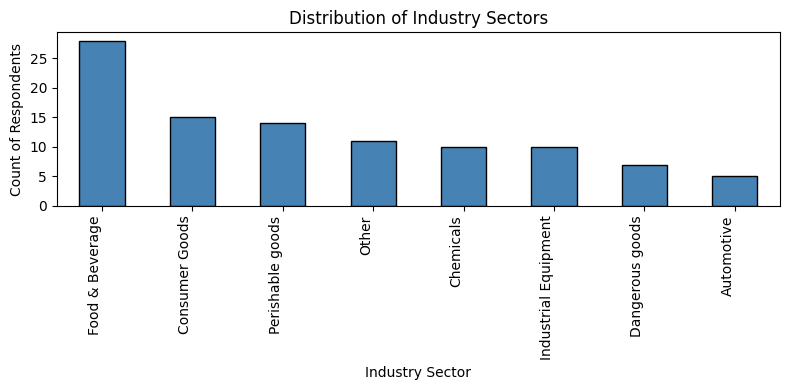

In [3]:
# --- 1. Industry Sector Distribution ---
plt.figure(figsize=(8,4))
df['Industry_Sector'].value_counts().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("Distribution of Industry Sectors")
plt.xlabel("Industry Sector")
plt.ylabel("Count of Respondents")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

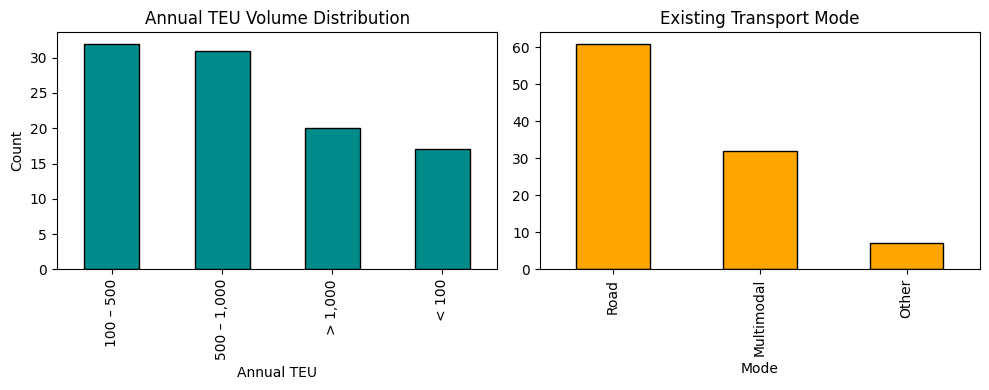

In [4]:
# --- 2. Annual TEU & Existing Mode ---
fig, ax = plt.subplots(1,2,figsize=(10,4))
df['Annual_TEU'].value_counts().plot(kind='bar', ax=ax[0], color='darkcyan', edgecolor='black')
ax[0].set_title("Annual TEU Volume Distribution")
ax[0].set_xlabel("Annual TEU")
ax[0].set_ylabel("Count")

df['Existing_Mode'].value_counts().plot(kind='bar', ax=ax[1], color='orange', edgecolor='black')
ax[1].set_title("Existing Transport Mode")
ax[1].set_xlabel("Mode")
plt.tight_layout()
plt.show()

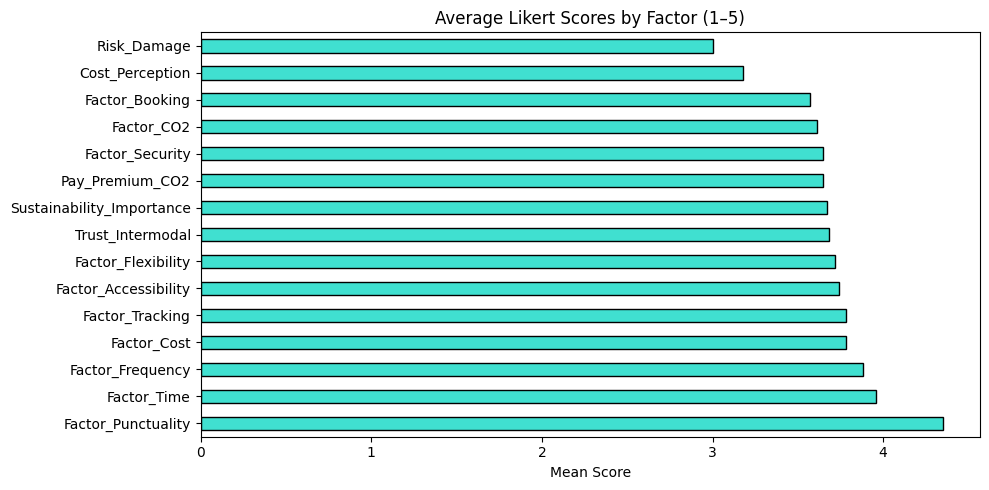

In [9]:
# --- 3. Likert-scale Factors (1–5) ---
likert_cols = [
    'Factor_Cost','Factor_Time','Factor_Frequency','Factor_Punctuality',
    'Factor_Accessibility','Factor_CO2','Factor_Flexibility','Factor_Security',
    'Factor_Tracking','Factor_Booking','Trust_Intermodal','Cost_Perception',
    'Risk_Damage','Sustainability_Importance','Pay_Premium_CO2'
]

plt.figure(figsize=(10,5))
df[likert_cols].mean().sort_values(ascending=False).plot(kind='barh', color='turquoise', edgecolor='black')
plt.title("Average Likert Scores by Factor (1–5)")
plt.xlabel("Mean Score")
plt.tight_layout()
plt.show()



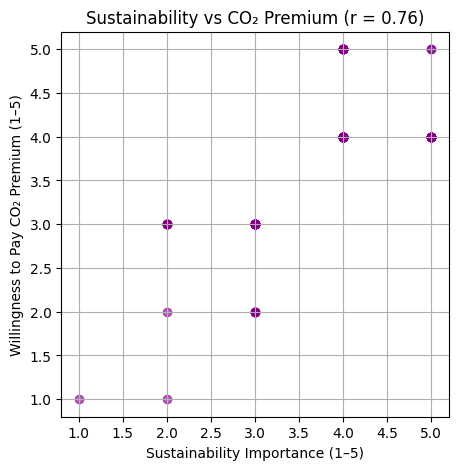

In [6]:
# --- 4. Correlation: Sustainability vs Pay_Premium_CO2 ---
corr = df['Sustainability_Importance'].corr(df['Pay_Premium_CO2'])
plt.figure(figsize=(5,5))
plt.scatter(df['Sustainability_Importance'], df['Pay_Premium_CO2'], alpha=0.6, color='purple')
plt.title(f"Sustainability vs CO₂ Premium (r = {corr:.2f})")
plt.xlabel("Sustainability Importance (1–5)")
plt.ylabel("Willingness to Pay CO₂ Premium (1–5)")
plt.grid(True)
plt.show()



In [7]:
# --- 5. SP Task 9 Dominance Check ---
print("\nSP Task 9 (Dominance) choices:")
print(df['SP_Task9_Dominance'].value_counts(normalize=True) * 100)




SP Task 9 (Dominance) choices:
SP_Task9_Dominance
Intermodal    97.0
Road           2.0
Other          1.0
Name: proportion, dtype: float64


In [8]:
# --- 6. SP Task 10 Consistency with Task 2 ---
consistency_rate = (df['SP_Task2'] == df['SP_Task10_Consistency']).mean() * 100
print(f"\nConsistency rate between Task 2 and Task 10: {consistency_rate:.1f}%")



Consistency rate between Task 2 and Task 10: 98.0%
